<a href="https://colab.research.google.com/github/bailos/D.I.T/blob/main/Statistic_project_BAYILI_Brahima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STACTISTIC PROJECT


# ***BAYILI Bahima : Master IA***

In [31]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, gamma
import pandas as pd
import seaborn as sns

**# Exercice 1**

Question 1 : Simuler un échantillon de taille 10000 suivant une loi binomiale B(30,0.2). Tracer l’histogramme de l’échantillon obtenu

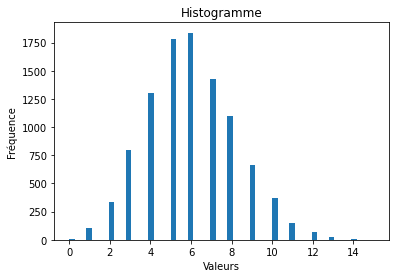

In [4]:

size1 = 10000
p = 0.2
n = 30
binom_sample = binom.rvs(n=n, p=p, size=size1) 
plt.hist(binom_sample, bins='auto')
plt.title("Histogramme")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence ")
plt.show()

Question 2 : Simuler un échantillon de taille 10000 suivant une loi normale N (3,.4). Tracer la fonction de densité de l’échantillon obtenu. Choisir un intervalle contenant 0 pour domaine de représentation.

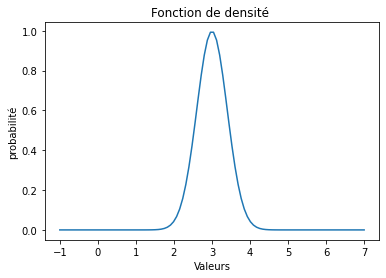

In [5]:

moyenne = 3
sigma = 0.4
norm_loi = norm.rvs(moyenne, sigma, size=size1)
plt.plot(np.linspace(-1, 7, num=100), norm.pdf(np.linspace(-1, 7, num=100), moyenne, sigma))
plt.title("Fonction de densité ")
plt.xlabel("Valeurs")
plt.ylabel("probabilité")
plt.show()

Question 3 : Simuler un échantillon de taille 10000 suivant une loi gamma γ(10,.5). Tracer la fonction de densité de l’échantillon obtenu. Choisir un intervalle contenant 0 pour domaine de représentation.

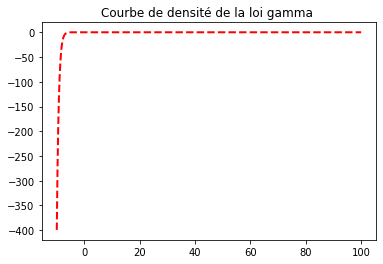

In [15]:
shape = 10
theta = 0.5
size = 10000
loigamma = np.random.gamma(shape, theta, size)
# Générer les X afin de tracer la courbe
X = np.linspace(-10,100,10000)

# Définition de la fonction 
def gamma_pdf(X, shape, theta):
    return (theta**shape)*(X**(shape-1))*np.exp(-theta*X)/np.math.gamma(shape)

Y = gamma_pdf(X, shape, theta)

# tracer de la  courbe
plt.figure(figsize=(6,4))
plt.plot(X, Y, 'r--', linewidth=2)
plt.title(label = "Courbe de densité de la loi gamma ")
plt.show()

# Exercice2

Exercice 2 Méthode de Monte Carlo

Estimer I2 par une méthode de Monte Carlo avec n = 10000
Observer par graphique l’évolution de cette estimation lorsque n varie et vérifier la cohérence avec la valeur
théorique I2 = π.

Estimation I2 est :  3.129963486271416
Valeur théorique de l'intégrale I2 :  3.141592653589793


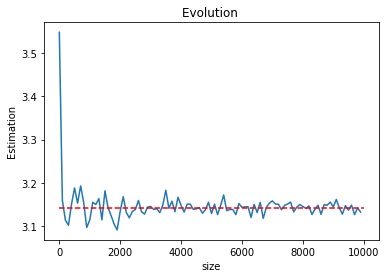

In [23]:
def fct(x):
    return 4 * np.sqrt(1 - x**2)

# Bornes de l'intégrale
a, b = 0, 1

n = 10000 # Size

x = np.random.random(n)
y = fct(x)

# Calcul de la moyenne
m_moyen = np.mean(y)
estima = (b - a) * m_moyen
print("Estimation I2 est : ", estima) # estimation I2
print("Valeur théorique de l'intégrale I2 : ", np.pi) # Vérification
N = np.arange(1, 10001, 100)
estimateur = np.zeros(N.shape)
for i in range(len(N)):
    x = np.random.random(N[i])
    y = fct(x)
    montant_moyen = np.mean(y)
    estimateur[i] = (b - a) * montant_moyen
plt.plot(N, estimateur)
plt.plot([0, 10000], [np.pi, np.pi], 'r--')
plt.xlabel('size')
plt.ylabel('Estimation')
plt.title('Evolution ')
plt.show()




```
# This is formatted as code
```

# Exercice3

Upload **file**

In [26]:
data = pd.read_csv("/content/sample_data/covid-senegal.csv", sep = ';', header =0)

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'], dayfirst = True)

# Supprimer les valeurs manquantes
data.dropna(inplace=True)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
data['proportion'] = round(data['cas'] / data['tests'], 2)

In [29]:
# Ajout de  la variable total

data['total'] = data['cas'].cumsum()
data.head()

,date,tests,cas,contact,importe,communautaire,proportion,total
0,2020-03-02,1.0,1,0,0,0,1.0,1
1,2020-03-03,2.0,1,0,1,0,0.5,2
2,2020-03-04,2.0,2,1,1,0,1.0,4
4,2020-03-06,2.0,0,0,0,0,0.0,4
5,2020-03-07,2.0,0,0,0,0,0.0,4


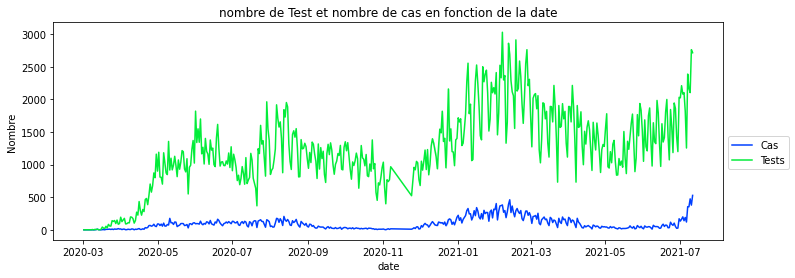

In [33]:
# Tracer le graphique
plt.figure(figsize=(12,4))
plt.style.use('seaborn-v0_8-bright')
sns.lineplot(x = "date", y = 'cas', data = data, label = "Cas")
sns.lineplot(x = "date", y = 'tests', data = data, label = "Tests")
plt.ylabel("Nombre")     
plt.title(label='nombre de Test et nombre de cas en fonction de la date')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

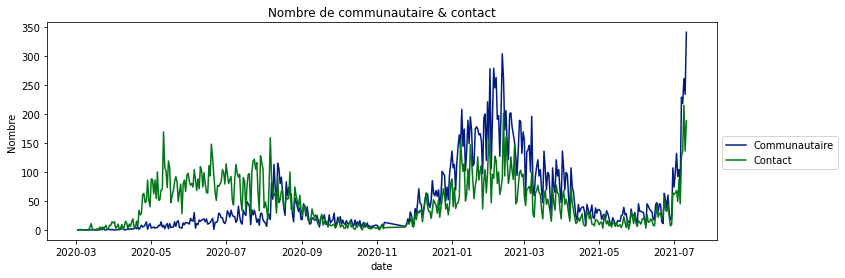

In [35]:
#  Représentation communautaire et contact en fonction de la date
#graphique
plt.figure(figsize=(12,4))
plt.style.use('seaborn-v0_8-dark-palette')
sns.lineplot(x = "date", y = 'communautaire', data = data, label = "Communautaire")
figure2 = sns.lineplot(x = "date", y = 'contact', data = data, label = "Contact")
figure2.set(ylabel = 'Nombre')  
plt.title(label='Nombre de communautaire & contact')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

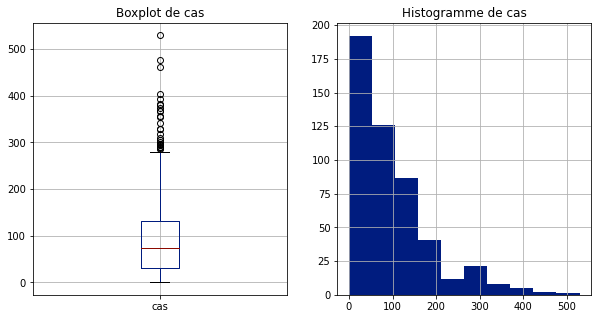

In [36]:
# L'histogramme de la variable cas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot(column=['cas'], ax=axs[0])
data['cas'].hist(ax=axs[1])
axs[0].set_title('Boxplot de cas')
axs[1].set_title('Histogramme de cas')
plt.show()

In [37]:
# 7 Discrétiser la variable cas

data["cas_classe"]=pd.qcut(data['cas'],4)
data

,date,tests,cas,contact,importe,communautaire,proportion,total,cas_classe
0,2020-03-02,1.0,1,0,0,0,1.00,1,"(-0.001, 30.0]"
1,2020-03-03,2.0,1,0,1,0,0.50,2,"(-0.001, 30.0]"
2,2020-03-04,2.0,2,1,1,0,1.00,4,"(-0.001, 30.0]"
4,2020-03-06,2.0,0,0,0,0,0.00,4,"(-0.001, 30.0]"
5,2020-03-07,2.0,0,0,0,0,0.00,4,"(-0.001, 30.0]"
...,...,...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,0.15,46489,"(131.0, 529.0]"
492,2021-07-08,2166.0,354,135,1,218,0.16,46843,"(131.0, 529.0]"
493,2021-07-09,2104.0,476,215,0,261,0.23,47319,"(131.0, 529.0]"
494,2021-07-10,2762.0,380,136,0,234,0.14,47699,"(131.0, 529.0]"


In [38]:
# Les fréquences des modalités de la nouvelle variable cas_classe
# Calcul des fréquences
frequences = (round(data["cas_classe"].value_counts(normalize=True), 4) * 100).astype(str) + '%'
print(frequences)

(-0.001, 30.0]    25.45%
(30.0, 74.0]      25.05%
(131.0, 529.0]    25.05%
(74.0, 131.0]     24.44%
Name: cas_classe, dtype: object


In [39]:
# 9. Estimation de lambda par la méthode des moments
lambda_moments = data['cas'].mean()
print('Estimation de lambda par la méthode des moments:', lambda_moments)

Estimation de lambda par la méthode des moments: 97.43030303030304


In [40]:
# 10. Estimation de lambda par la méthode du maximum de vraisemblance
# L'estimateur par la méthode du maximum de vraisemblance (EMV) d'une
# variable suivant une loi de _P_ (λ), λ > 0 est la moyenne empirique
lambda_mle = data['cas'].mean()
print('Estimation de lambda par la méthode du maximum de vraisemblance:', lambda_mle)

Estimation de lambda par la méthode du maximum de vraisemblance: 97.43030303030304


# **Exercice4**

In [41]:
#  Enregistrer les données et vérifier si vous avez une
# structure de 799 observations et 26 variables

df = pd.read_csv('/content/drive/MyDrive/Master_IA_DIT_2022/Course_Statistic_For_Datascience/exercices_pratiques_stat/smp.csv', sep = ';', header =0)
# vérifier la taille des donnees
print(df.shape) 

(799, 26)


In [42]:

#  Changement  de types des variables

# variables catégorielles
cat_vars = ['prof','duree','discip','ecole','separation','juge.enfant','place','abus','grav.cons',
               'dep.cons','ago.cons','ptsd.cons','alc.cons','subst.cons','scz.cons','char','rs','ed',
               'dr','suicide.hr','suicide.past']

# Conversion des variables catégorielles en type "category"
df[cat_vars] = df[cat_vars].astype('category')

# Conversion des variables numériques
df['age'] = df['age'].astype('float64')
df['n.enfant'] = df['n.enfant'].astype('float64')
df['suicide.s'] = df['suicide.s'].astype('float64')
df['dur.interv'] = df['dur.interv'].astype('float64')
df['n.fratrie'] = df['n.fratrie'].astype('int64')

# Vérification du résultat
df.dtypes

age              float64
prof            category
duree           category
discip          category
n.enfant         float64
n.fratrie          int64
ecole           category
separation      category
juge.enfant     category
place           category
abus            category
grav.cons       category
dep.cons        category
ago.cons        category
ptsd.cons       category
alc.cons        category
subst.cons      category
scz.cons        category
char            category
rs              category
ed              category
dr              category
suicide.s        float64
suicide.hr      category
suicide.past    category
dur.interv       float64
dtype: object

In [43]:
# Calcul de la  lamoyenne, la variance, et l’écart type

print(df[['age', 'n.enfant', 'n.fratrie', 'dur.interv']].mean().round(2))
print(df[['age', 'n.enfant', 'n.fratrie', 'dur.interv']].var().round(2))
print(df[['age', 'n.enfant', 'n.fratrie', 'dur.interv']].std().round(2))
print(df['age'].quantile([0.25, 0.5, 0.75]))

age           38.90
n.enfant       1.76
n.fratrie      4.29
dur.interv    61.89
dtype: float64
age           176.38
n.enfant        3.36
n.fratrie      11.84
dur.interv    386.89
dtype: float64
age           13.28
n.enfant       1.83
n.fratrie      3.44
dur.interv    19.67
dtype: float64
0.25    28.0
0.50    37.0
0.75    48.0
Name: age, dtype: float64


<ipython-input-44-919f68bcf11b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


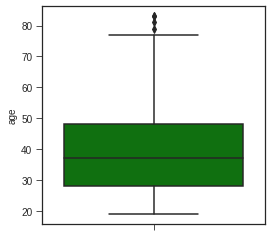

In [44]:
# Tracer le boxplot de  la variable age

plt.style.use('seaborn-ticks')
plt.figure(figsize=(4,4))
Figure = sns.boxplot(data = df,
                     y = 'age',
                     color = 'green'
                     )
plt.show()


### Conclusions :

- La base contient de valeur aberante et 75% des individus de la base ont moins de 50 ans

In [46]:
# Afficher les données pour les agriculteurs qui ont plus de 2 enfants
print(df[(df['prof'] == 'agriculteur') & (df['n.enfant'] > 2)])

      age         prof duree discip  n.enfant  n.fratrie ecole separation  \
14   64.0  agriculteur   NaN    0.0       3.0          2   1.0        0.0   
311  42.0  agriculteur   4.0    0.0       3.0          6   1.0        0.0   
390  36.0  agriculteur   4.0    1.0       3.0          4   3.0        1.0   
441  79.0  agriculteur   5.0    0.0       5.0          6   2.0        0.0   

    juge.enfant place  ... subst.cons scz.cons char   rs   ed   dr suicide.s  \
14          0.0   0.0  ...          0        0  1.0  1.0  1.0  3.0       0.0   
311         0.0   0.0  ...          0        0  2.0  1.0  3.0  2.0       3.0   
390         1.0   1.0  ...          1        0  1.0  NaN  3.0  1.0       0.0   
441         0.0   0.0  ...          0        0  1.0  2.0  1.0  1.0       0.0   

    suicide.hr suicide.past dur.interv  
14         0.0          0.0       80.0  
311        1.0          0.0        NaN  
390        0.0          0.0        NaN  
441        0.0          0.0       85.0  

[4 rows

In [48]:
# Calcul des fréquences des modalités de la variable prof.
frequences = (round(df["prof"].value_counts(normalize=True), 4) * 100).astype(str) + '%'
frequences

ouvrier                            28.63%
sans emploi                        27.99%
employe                            17.02%
artisan                            11.35%
prof.intermediaire                  7.31%
autre                               3.91%
cadre                 3.0300000000000002%
agriculteur                         0.76%
Name: prof, dtype: object

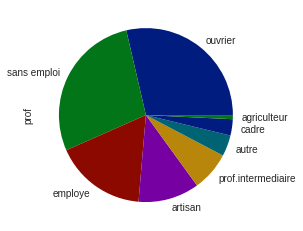

<Figure size 576x576 with 0 Axes>

In [49]:
#  Diagramme circulaire de la variable profession
df['prof'].value_counts().plot(kind='pie')
plt.figure(figsize=(8,8))
plt.style.use('dark_background')
plt.show()

In [50]:
# Donner les moyennes des âges par profession
(df.groupby('prof')['age'].mean().round(2)).astype(str) + '%'

prof
agriculteur           48.83%
artisan               45.11%
autre                 34.94%
cadre                 50.08%
employe               38.71%
ouvrier                37.4%
prof.intermediaire    43.26%
sans emploi            35.9%
Name: age, dtype: object

In [51]:
# Donner la table des effectifs pour les variables prof incluant les ”NaN”
pd.crosstab(df['prof'], columns='count', dropna=False)

col_0,count
prof,
agriculteur,6
artisan,90
autre,31
cadre,24
employe,135
ouvrier,227
prof.intermediaire,58
sans emploi,222


In [52]:
#  Donner le nombre de ”Nan” pour chaque variable
df.isna().sum()

age               2
prof              6
duree           223
discip            6
n.enfant         26
n.fratrie         0
ecole             5
separation       11
juge.enfant       5
place             7
abus              7
grav.cons         4
dep.cons          0
ago.cons          0
ptsd.cons         0
alc.cons          0
subst.cons        0
scz.cons          0
char             96
rs              103
ed              107
dr              111
suicide.s        41
suicide.hr       39
suicide.past     14
dur.interv       50
dtype: int64

In [ ]:
#  Suppression des lignes contenant des NaN
df = df.dropna()

In [53]:

# Verifier qu'il n'y a plus de valeurs manquantes 
df.isna().sum()

age               2
prof              6
duree           223
discip            6
n.enfant         26
n.fratrie         0
ecole             5
separation       11
juge.enfant       5
place             7
abus              7
grav.cons         4
dep.cons          0
ago.cons          0
ptsd.cons         0
alc.cons          0
subst.cons        0
scz.cons          0
char             96
rs              103
ed              107
dr              111
suicide.s        41
suicide.hr       39
suicide.past     14
dur.interv       50
dtype: int64

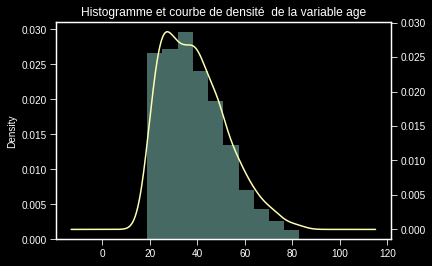

In [54]:
# Histogramme et la densité de la variable age sur la même figure
plt.hist(df['age'], density=True, alpha=0.5)
df['age'].plot(kind='kde', secondary_y=True)
plt.title(label ='Histogramme et courbe de densité  de la variable age')
plt.show()

In [55]:
# Discrétisez la variable age
df["age_classe"]=pd.qcut(df.age,4)
df

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,...,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv,age_classe
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,...,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,"(28.0, 37.0]"
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,...,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0,"(48.0, 83.0]"
2,50.0,prof.intermediaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,...,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN,"(48.0, 83.0]"
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,...,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0,"(37.0, 48.0]"
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,...,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN,"(18.999, 28.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,28.0,sans emploi,5.0,0.0,1.0,4,1.0,NaN,1.0,0.0,...,0,NaN,3.0,1.0,3.0,1.0,0.0,0.0,60.0,"(18.999, 28.0]"
795,44.0,ouvrier,4.0,1.0,1.0,12,2.0,0.0,0.0,0.0,...,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,105.0,"(37.0, 48.0]"
796,31.0,cadre,4.0,0.0,3.0,6,4.0,1.0,1.0,1.0,...,0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,105.0,"(28.0, 37.0]"
797,38.0,employe,5.0,0.0,0.0,1,3.0,0.0,0.0,0.0,...,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,75.0,"(37.0, 48.0]"


In [56]:
# 14 Donner les fréquences des modalités de la nouvelle variable age_classe
freq_age_classe = (df['age_classe'].value_counts(normalize=True).mul(100).round(2)).astype(str) + '%'
freq_age_classe

(18.999, 28.0]     26.6%
(37.0, 48.0]      26.22%
(28.0, 37.0]      23.84%
(48.0, 83.0]      23.34%
Name: age_classe, dtype: object